# 样例数据集

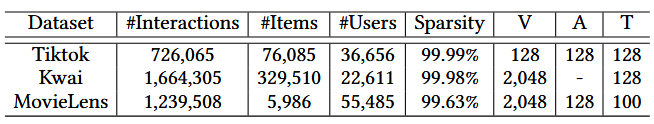

In [6]:
import torch
import numpy as np

In [2]:
tiktok_path = "/home/yzh/code/MMGCN/dataset_sample/tiktok"

## 多模态特征

In [3]:
v_feat = torch.load(f"{tiktok_path}/v_feat_sample.pt")

In [4]:
print(v_feat.shape)

torch.Size([1651, 128])


他也没说，那就当按照 item_id 堆叠的模态特征了 (item_num, dim)

## 训练集

In [7]:
train = np.load(f"{tiktok_path}/train_sample.npy")
print(train.shape)

(1929, 2)


In [12]:
for i in range(10):
    print(train[i])

[   0 1282]
[   0 1012]
[  0 584]
[  0 721]
[  0 710]
[  0 574]
[  0 860]
[  0 743]
[  1 615]
[  1 829]


训练集大小为 (num, 2)，每行表示 (user_id, pos_id)

## 验证/测试集

In [27]:
import numpy as np

test = np.load(f"{tiktok_path}/test_sample.npy", allow_pickle=True)
print(test.shape)

(100,)


In [28]:
for i in range(10):
    print(test[i])
    print(type(test[i]))

[0, 584]
<class 'list'>
[1, 592, 673]
<class 'list'>
[2, 638]
<class 'list'>
[3, 15]
<class 'list'>
[4, 1004]
<class 'list'>
[5, 611]
<class 'list'>
[6, 1177]
<class 'list'>
[7, 885]
<class 'list'>
[8, 884]
<class 'list'>
[9, 634]
<class 'list'>


测试集为 (num, >=1?)，每行表示 [user, pos_ids, ...]

但样例的形状是 1 维，说明这里面放的是 Python object (list)...... 6 😅

In [18]:
val = np.load(f"{tiktok_path}/val_sample.npy", allow_pickle=True)
print(val.shape)

(100,)


In [19]:
for i in range(10):
    print(val[i])

[0, 743]
[1, 1261, 1064]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]


验证集跟测试集同理，我希望因为这是样例数据所以这么奇葩

## 奇怪的交互字典

In [61]:
import numpy as np

dict_sample = np.load(f"{tiktok_path}/user_item_dict_sample.npy", allow_pickle=True)
print(type(dict_sample))
print(dict_sample.shape)

<class 'numpy.ndarray'>
()


In [40]:
print(dict_sample)

{0: [1282, 1012, 584, 721, 710, 574, 860, 743], 1: [615, 829, 923, 1237, 1458, 1261, 830, 820, 868, 695, 993, 687, 1064, 880, 592, 1520, 673], 2: [638], 3: [15], 4: [809, 208, 1004, 525], 5: [784, 669, 618, 979, 611], 6: [1177], 7: [812, 885], 8: [884], 9: [1270], 10: [738, 1422, 1330, 810, 544, 101, 1192, 748, 609, 1035, 622, 594, 1324], 11: [224, 357, 1022, 268, 653, 801, 236, 722, 341, 618, 273, 1482, 366, 1357, 456, 394, 509, 1016, 633, 478, 315, 940, 547, 680], 12: [1059], 13: [676, 1296, 1149, 1147, 916], 14: [632], 15: [603, 713, 646, 682, 562, 649, 843, 1080, 749, 975, 1175, 904, 614, 572, 803, 962, 978, 1500, 578, 949, 662, 807, 880, 774, 699, 1363, 1442, 859, 813, 754, 1131, 1016, 1195, 229, 705, 1074, 1367, 1181, 1431, 638, 1426, 676, 919, 711, 1001, 551, 1360, 555, 602], 16: [108, 819, 428, 1548, 1512, 322, 382, 1201, 200, 66], 17: [792, 628, 598, 658, 763, 579, 975, 966, 622, 593, 700], 18: [1371], 19: [586], 20: [1454], 21: [267, 1211, 1632, 565, 902, 871, 572, 1100, 624,

这明明是个 dict 为什么要存 npy 啊... json 不香吗

In [41]:
ui_dict = dict_sample[()]
print(type(ui_dict))

<class 'dict'>


In [42]:
print(ui_dict.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])


# 数据集转换

## 多模态特征

将 MMSSL 格式的 npy 处理成 pt 应该就行了

In [4]:
out = "/home/yzh/code/MMGCN/Data/ifashion"

In [21]:
import numpy as np
import torch

先试试原始维度能不能跑

In [22]:
# 图像
image_feat = np.load('ifashion_ds/image_feat.npy')
image_feat_tensor = torch.from_numpy(image_feat)
torch.save(image_feat_tensor, 'ifashion_ds/image_feat.pt')

In [24]:
t = torch.load('ifashion_ds/image_feat.pt')
print(t.shape)
del t

torch.Size([51939, 512])


In [25]:
# 文本
text_feat = np.load('ifashion_ds/text_feat.npy')
text_feat_tensor = torch.from_numpy(text_feat)
torch.save(text_feat_tensor, 'ifashion_ds/text_feat.pt')

In [26]:
t = torch.load('ifashion_ds/text_feat.pt')
print(t.shape)
del t

torch.Size([51939, 1024])


## 交互数据

训练集其实就是将逐行的 interactions 用 `.npy` 存起来，内容一样

In [6]:
import numpy as np
import json
from collections import defaultdict

with open("ifashion_ds/remap/user2id.json", 'r', encoding='utf-8') as f1:
    user2id: dict[str, int] = json.load(f1)

with open("ifashion_ds/remap/item2id.json", 'r', encoding='utf-8') as f2:
    item2id: dict[str, int] = json.load(f2)

user_item_pairs = []

with open('ifashion_ds/filter_interactions.txt', 'r') as train_file:
    for line in train_file:
        user, item, _ratings = line.split(' ')
        user_item_pairs.append([user2id[user], item2id[item]])

user_item_array = np.array(user_item_pairs)
print(user_item_array.shape)

(1093863, 2)


In [7]:
np.save(f'{out}/train.npy', user_item_array)

In [10]:
import json

with open('ifashion_ds/remap/ifashion_val.json', 'r') as val_file:
    val_data = json.load(val_file)

val_out = []
for user, items in val_data.items():
    merge = [int(user)]
    merge.extend(items)
    val_out.append(merge)

val_array = np.array(val_out, dtype=object)
np.save(f'{out}/val.npy', val_array)

In [11]:
t = np.load(f'{out}/val.npy', allow_pickle=True)
print(t.shape)
del t

(33785,)


In [12]:
import json

with open('ifashion_ds/remap/ifashion_test.json', 'r') as test_file:
    test_data = json.load(test_file)

test_out = []
for user, items in test_data.items():
    merge = [int(user)]
    merge.extend(items)
    test_out.append(merge)

test_array = np.array(test_out, dtype=object)
np.save(f'{out}/test.npy', test_array)

In [13]:
t = np.load(f'{out}/test.npy', allow_pickle=True)
print(t.shape)
del t

(37510,)


In [57]:
%%bash
rsync -avcP ifashion_ds/image_feat.pt ../Data/ifashion/v_feat.pt
rsync -avcP ifashion_ds/text_feat.pt ../Data/ifashion/t_feat.pt

sending incremental file list
image_feat.pt
    106,372,267 100%  393.07MB/s    0:00:00 (xfr#1, to-chk=0/1)

sent 106,398,356 bytes  received 35 bytes  212,796,782.00 bytes/sec
total size is 106,372,267  speedup is 1.00
sending incremental file list
text_feat.pt
    212,743,334 100%  396.20MB/s    0:00:00 (xfr#1, to-chk=0/1)

sent 212,795,391 bytes  received 35 bytes  141,863,617.33 bytes/sec
total size is 212,743,334  speedup is 1.00


## 交互字典

In [8]:
import json

with open('ifashion_ds/remap/interactions.json', 'r') as file:
    user_item_dict = json.load(file)

ui_dict = {int(user): items for user, items in user_item_dict.items()}
user_item_array = np.array(ui_dict, dtype=object)
np.save(f'{out}/user_item_dict.npy', user_item_array)

In [9]:
t = np.load(f'{out}/user_item_dict.npy', allow_pickle=True)
print(t.shape)

()
